In [1]:
using ObjectLearning
O = ObjectLearning;

In [2]:
table_mesh = O.Mesh(O.j.mesh.make_cuboid_mesh([20.0, 0.01, 20.0]));
table_pose = O.IDENTITY_POSE
table_node = O.FloatingNode(:table, table_mesh, table_pose);

In [3]:
mustard_bottle_mesh = O.load_ycb_mesh(5; scale=100)
mustard_bottle_cparams = O.ContactParams(O.top, O.front, (0.0, 0.0, π/3))
mustard_bottle_node = O.ChildNode(:mustard, mustard_bottle_mesh, mustard_bottle_cparams);

In [4]:
ycb_scene = O.TableTopSceneGraph(table_node, [mustard_bottle_node]);

In [5]:
pos = [0.0, -7.0, 7.0]
target = [0.0, 0.0, 0.0]
up = [0.0, -1.0, 0.0]
cam_pose = O.cam_pose_from_pos_target_up(pos, target, up);

In [6]:
intrinsics = O.Intrinsics((height=300, width=300,
           fx=200.0, fy=200.0,
           cx=150.0, cy=150.0,
           near=0.001, far=50.0));

In [7]:
ycb_img = O.render_scene(ycb_scene, cam_pose, intrinsics);

Increasing frame buffer size to (width, height, depth) = (320, 320, 2048)


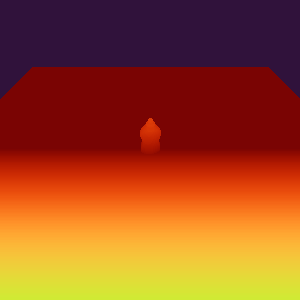

In [11]:
O.j.get_depth_image(O.np.array(ycb_img.arr)[:, :, 3]; max=10)

In [9]:
dimg = O.random(O.stoch_renderer, ycb_scene, cam_pose, intrinsics, 1e-3, 1e-2);

Increasing frame buffer size to (width, height, depth) = (320, 320, 2048)


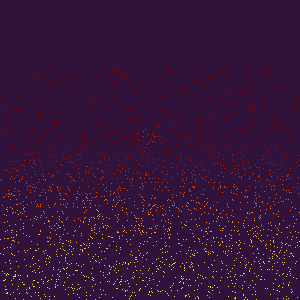

In [10]:
O.j.get_depth_image(O.np.array(dimg.arr)[:, :, 3]; max=10)